In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading dataset and running some basic methods to know more about datasets
df = pd.read_csv('./input/dataset/Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


#checking for outliers using box plot
for col for df.columns:
    if df[col].dtype = 'float64' or df[col].dtype = 'int64':
        print(col)
        df.boxplot(column = col)
        plt.show()
        

In [10]:
numerical_columns = ['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Initialize a dictionary to store the number of outliers for each column
outliers_count = {}

for col in numerical_columns:
    # Calculate the IQR for each numerical column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Identify potential outliers using the IQR method
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) |
                (df[col] > (Q3 + 1.5 * IQR)))
    
    # Count the number of outliers for the current column
    num_outliers = outliers.sum()
    
    # Store the count in the dictionary
    outliers_count[col] = num_outliers

# Display the number of outliers for each column
for col, count in outliers_count.items():
    print(f"Number of outliers in column '{col}': {count}")

Number of outliers in column 'step': 102688
Number of outliers in column 'amount': 338078
Number of outliers in column 'oldbalanceOrg': 1112507
Number of outliers in column 'newbalanceOrig': 1053391
Number of outliers in column 'oldbalanceDest': 786135
Number of outliers in column 'newbalanceDest': 738527


0    6354407
1       8213
Name: isFraud, dtype: int64

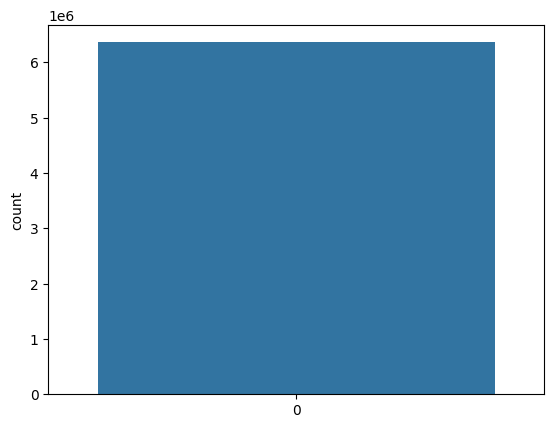

In [11]:
sns.countplot(df["isFraud"])
df.isFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

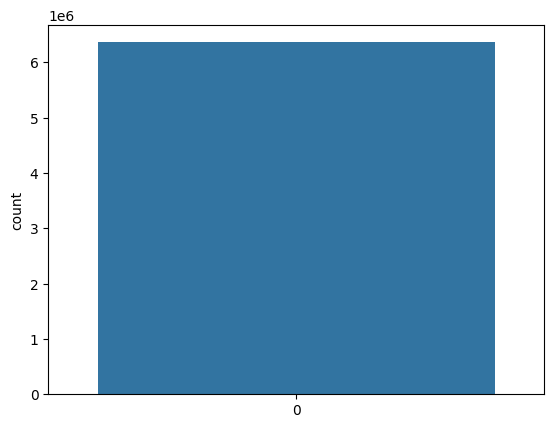

In [12]:
sns.countplot(df["isFlaggedFraud"])
df.isFlaggedFraud.value_counts()

In [13]:
df.corr()

/tmp/ipykernel_19475/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


/tmp/ipykernel_19475/3685784014.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


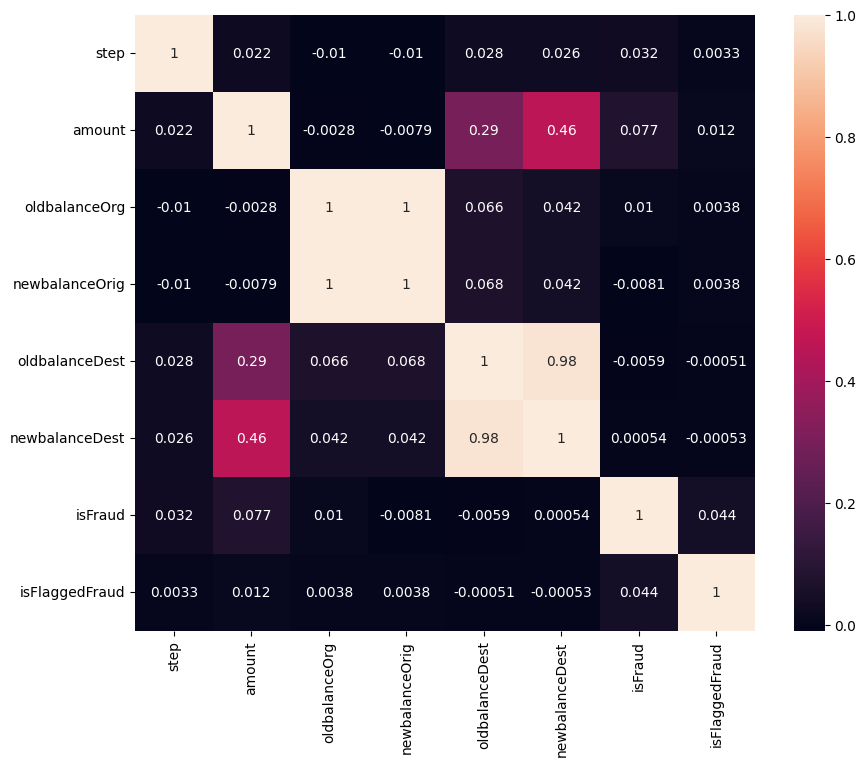

In [14]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [15]:
# Create new columns for balance changes
df['balanceChangeOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Drop the original balance columns
df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
df.type.value_counts()

In [ ]:
col_name = df.columns.tolist()
print(col_name)

In [ ]:
encoded_types = pd.get_dummies(df['type'], prefix='type')
df = pd.concat([df, encoded_types], axis=1)

# Drop the original 'type' column
df.drop(['type'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['nameOrig'] = labelencoder.fit_transform(df['nameOrig'])
df['nameDest'] = labelencoder.fit_transform(df['nameDest'])

In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (Y)
X = df.drop(['isFraud'], axis=1) # Feature
y= df['isFraud'] # Tagret

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

In [ ]:
model.score(X_train_scaled, y_train)

In [ ]:
model.score(X_test_scaled, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 2)
model_dt.fit(X_train_scaled, y_train)

In [ ]:
feature_importances = model_dt.feature_importances_

# Create a dataframe to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort feature by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import StandardScaler
from pyspark.sql.functions import col

In [ ]:
# Create a Spark session
spark = SparkSession.builder.appName("FraudDetection").getOrCreate()

In [ ]:
# Load the datase
data = spark.read.csv('./input/dataset/Fraud.csv', header=True, inferSchema=True)

In [ ]:
# Display basic information about the dataset
data.show(5)
data.printSchema()

In [ ]:
# Data Preprocessing
# Drop duplicates and rows with missing values
data = data.dropDuplicates()
data = data.dropna()

In [ ]:
# Feature Engineering
feature_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data = assembler.transform(data)

In [ ]:
# Split the data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Logistic Regression for Classification
lr = LogisticRegression(labelCol='isFraud', featuresCol='features')
lr_model = lr.fit(train_data)

In [ ]:
# Make predictions on the test set
lr_predictions = lr_model.transform(test_data)

In [ ]:
# Evaluate the Logistic Regression model
evaluator = BinaryClassificationEvaluator(labelCol='isFraud')
lr_auc = evaluator.evaluate(lr_predictions)
print("Logistic Regression AUC:", lr_auc)

In [ ]:
# K-Means Clustering
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
scaler_model = scaler.fit(data)
scaled_data = scaler_model.transform(data)

In [ ]:
# Train a K-Means model
kmeans = KMeans().setK(2).setSeed(42)
kmeans_model = kmeans.fit(scaled_data)

In [ ]:
# Add cluster labels to the data
clustered_data = kmeans_model.transform(scaled_data)

In [ ]:
# Show the results of clustering
clustered_data.select("features", "scaledFeatures", "prediction").show(10)

In [ ]:
# Logistic Regression Analysis
# Display the coefficients and intercept of the logistic regression model
coefficients = lr_model.coefficients
intercept = lr_model.intercept
print("Coefficients: ", coefficients)
print("Intercept: ", intercept)

In [ ]:
# Classification Metrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
# Evaluate precision, recall, F1-score, and accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="isFraud", predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(lr_predictions)
print("Accuracy:", accuracy)

In [ ]:
# Confusion Matrix
tp = lr_predictions.filter("prediction = 1 AND isFraud = 1").count()
tn = lr_predictions.filter("prediction = 0 AND isFraud = 0").count()
fp = lr_predictions.filter("prediction = 1 AND isFraud = 0").count()
fn = lr_predictions.filter("prediction = 0 AND isFraud = 1").count()

In [ ]:
confusion_matrix = [[tn, fp], [fn, tp]]
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)

In [ ]:
# K-Means Clustering Analysis
# Calculate the within-set sum of squared distances for each cluster
wssse = kmeans_model.computeCost(scaled_data)
print("Within-Set Sum of Squared Distances:", wssse)

In [ ]:
# Display cluster centers
cluster_centers = kmeans_model.clusterCenters()
print("Cluster Centers:")
for center in cluster_centers:
    print(center)

In [ ]:
# Display the size of each cluster
cluster_sizes = clustered_data.groupBy("prediction").count()
cluster_sizes.show()

In [ ]:
# Visualize the distribution of the 'isFraud' column within each cluster
cluster_fraud_distribution = clustered_data.groupBy("prediction", "isFraud").count().orderBy("prediction", "isFraud")
cluster_fraud_distribution.show()

In [ ]:
# Stop the Spark session
spark.stop()